In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler;
from sklearn.metrics import mean_squared_error
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
import joblib
import scienceplots
import os 
import re
import random

In [2]:
save_directory = r'C:\Users\LENOVO\OneDrive - Universidade de Aveiro\universidade\Mestrado\2º Ano\Tese\Códigos\Test_epanet\Samples\Results\Richmond'

# Richmond

In [3]:
df = pd.read_csv(r'C:\Users\LENOVO\OneDrive - Universidade de Aveiro\universidade\Mestrado\2º Ano\Tese\Códigos\Test_epanet\samples\Richmond\rich_dynamic_30_000.csv', index_col=False)
df_out = pd.read_csv(r'C:\Users\LENOVO\OneDrive - Universidade de Aveiro\universidade\Mestrado\2º Ano\Tese\Códigos\Test_epanet\samples\Richmond\rich_dynamic_out_30_000.csv', index_col=False)

In [4]:
df.head()

,t_step,tank_0,tank_1,tank_2,tank_3,tank_4,tank_5,pumps_0,pumps_1,pumps_2,...,junction_25,junction_27,junction_28,junction_34,tank_final_0,tank_final_1,tank_final_2,tank_final_3,tank_final_4,tank_final_5
0,300,10.9577,8.2530,9.9047,9.4559,10.4719,1.8447,0.0,1.0,1.0,...,0.068107,2.234689,0.146088,22.779335,10.9863,8.2431,9.9062,9.4665,10.4756,1.8404
1,300,7.8323,10.9947,8.2816,11.5419,9.9518,0.5221,1.0,0.0,1.0,...,0.055114,2.094857,0.049487,11.106589,7.8568,11.0085,8.2526,11.5240,9.9439,0.5801
2,300,8.0856,11.9905,4.0415,3.4809,7.4476,11.3622,0.0,1.0,1.0,...,0.090135,2.067899,0.081345,14.142575,8.1135,12.0144,4.0167,3.4582,7.4516,11.3598
3,300,9.1189,10.7665,10.2571,1.6042,9.8643,8.4563,0.0,0.0,0.0,...,0.112894,0.725460,0.067134,7.474760,9.1074,10.7636,10.2646,1.5922,9.8772,8.4543
4,300,11.8616,2.8812,2.3794,6.2762,6.7450,6.2102,1.0,0.0,0.0,...,0.102647,1.094591,0.041792,18.513454,11.8545,2.8641,2.3844,6.2464,6.7474,6.2438


In [5]:
df.columns

Index(['t_step', 'tank_0', 'tank_1', 'tank_2', 'tank_3', 'tank_4', 'tank_5',
       'pumps_0', 'pumps_1', 'pumps_2', 'pumps_3', 'pumps_4', 'pumps_5',
       'pumps_6', 'pumps_kw_0', 'pumps_kw_1', 'pumps_kw_2', 'pumps_kw_3',
       'pumps_kw_4', 'pumps_kw_5', 'pumps_kw_6', 'junction_2', 'junction_3',
       'junction_10', 'junction_13', 'junction_16', 'junction_24',
       'junction_25', 'junction_27', 'junction_28', 'junction_34',
       'tank_final_0', 'tank_final_1', 'tank_final_2', 'tank_final_3',
       'tank_final_4', 'tank_final_5'],
      dtype='object')

In [6]:
df_out.columns

Index(['Δtank_0', 'Δtank_1', 'Δtank_2', 'Δtank_3', 'Δtank_4', 'Δtank_5'], dtype='object')

**Passar potencia das bombas para output**

In [7]:
for f in range (7):
    df_out['pumps_kw_'+str(f)] = df.filter(['pumps_kw_'+str(f)],axis=1)

In [8]:
columns_to_drop = [column for column in df.columns if column.startswith('pumps_kw_')]
# Drop the specified columns from the DataFrame
df = df.drop(columns=columns_to_drop)
# Print the DataFrame after dropping the columns
print(df.columns)


Index(['t_step', 'tank_0', 'tank_1', 'tank_2', 'tank_3', 'tank_4', 'tank_5',
       'pumps_0', 'pumps_1', 'pumps_2', 'pumps_3', 'pumps_4', 'pumps_5',
       'pumps_6', 'junction_2', 'junction_3', 'junction_10', 'junction_13',
       'junction_16', 'junction_24', 'junction_25', 'junction_27',
       'junction_28', 'junction_34', 'tank_final_0', 'tank_final_1',
       'tank_final_2', 'tank_final_3', 'tank_final_4', 'tank_final_5'],
      dtype='object')


Alterar nome tank_final_... para final_tank_...

In [9]:
columns_to_rename = [column for column in df.columns if column.startswith('tank_final_')]
# Rename the columns
renamed_columns = {column: column.replace('tank_final_', 'final_tank_') for column in columns_to_rename}
df = df.rename(columns=renamed_columns)
print(df.columns)

Index(['t_step', 'tank_0', 'tank_1', 'tank_2', 'tank_3', 'tank_4', 'tank_5',
       'pumps_0', 'pumps_1', 'pumps_2', 'pumps_3', 'pumps_4', 'pumps_5',
       'pumps_6', 'junction_2', 'junction_3', 'junction_10', 'junction_13',
       'junction_16', 'junction_24', 'junction_25', 'junction_27',
       'junction_28', 'junction_34', 'final_tank_0', 'final_tank_1',
       'final_tank_2', 'final_tank_3', 'final_tank_4', 'final_tank_5'],
      dtype='object')


In [10]:
df_out.head()
# pumps_energy in Kw

,Δtank_0,Δtank_1,Δtank_2,Δtank_3,Δtank_4,Δtank_5,pumps_kw_0,pumps_kw_1,pumps_kw_2,pumps_kw_3,pumps_kw_4,pumps_kw_5,pumps_kw_6
0,0.000095,-0.000033,0.000005,0.000035,0.000012,-0.000014,0.00,59.51,6.46,11.83,21.18,17.07,0.00
1,0.000082,0.000046,-0.000097,-0.000060,-0.000026,0.000193,1.87,0.00,6.28,0.00,21.26,0.00,59.36
2,0.000093,0.000080,-0.000083,-0.000076,0.000013,-0.000008,0.00,48.73,6.15,0.00,21.88,0.00,48.73
3,-0.000038,-0.000010,0.000025,-0.000040,0.000043,-0.000007,0.00,0.00,0.00,11.85,0.00,0.00,43.52
4,-0.000024,-0.000057,0.000017,-0.000099,0.000008,0.000112,1.61,0.00,0.00,11.86,0.00,0.00,0.00


In [11]:
df.max() #Para verificar o valor maximo de todas as variáveis.

t_step          300.000000
tank_0           11.999600
tank_1           13.369400
tank_2           12.109600
tank_3           13.649700
tank_4           12.689700
tank_5           12.189900
pumps_0           1.000000
pumps_1           1.000000
pumps_2           1.000000
pumps_3           1.000000
pumps_4           1.000000
pumps_5           1.000000
pumps_6           1.000000
junction_2        9.144517
junction_3        5.924525
junction_10      18.192862
junction_13       3.429300
junction_16       5.972986
junction_24       1.609962
junction_25       0.177096
junction_27       2.286156
junction_28       0.161000
junction_34      26.162090
final_tank_0     12.000000
final_tank_1     13.370000
final_tank_2     12.110000
final_tank_3     13.650000
final_tank_4     12.690000
final_tank_5     12.190000
dtype: float64

In [12]:
# somatorio da potencia de todas as bombas naquele time step
df_out["total_pumps_kw"] = 0
for d in range(7):
    df_out["total_pumps_kw"] += df_out["pumps_kw_"+str(d)]
df_out.head()

,Δtank_0,Δtank_1,Δtank_2,Δtank_3,Δtank_4,Δtank_5,pumps_kw_0,pumps_kw_1,pumps_kw_2,pumps_kw_3,pumps_kw_4,pumps_kw_5,pumps_kw_6,total_pumps_kw
0,0.000095,-0.000033,0.000005,0.000035,0.000012,-0.000014,0.00,59.51,6.46,11.83,21.18,17.07,0.00,116.05
1,0.000082,0.000046,-0.000097,-0.000060,-0.000026,0.000193,1.87,0.00,6.28,0.00,21.26,0.00,59.36,88.77
2,0.000093,0.000080,-0.000083,-0.000076,0.000013,-0.000008,0.00,48.73,6.15,0.00,21.88,0.00,48.73,125.49
3,-0.000038,-0.000010,0.000025,-0.000040,0.000043,-0.000007,0.00,0.00,0.00,11.85,0.00,0.00,43.52,55.37
4,-0.000024,-0.000057,0.000017,-0.000099,0.000008,0.000112,1.61,0.00,0.00,11.86,0.00,0.00,0.00,13.47


## SPLIT x and y

In [13]:
# In
X = df.loc[:, 'tank_0':'junction_34']
# Out
y= df_out.loc[:,'Δtank_0':'pumps_kw_6']

new_x = X.copy()


### Train/Test split

In [14]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

## Standardize tanks, demands and pumps kw.

In [15]:
X_train_st=X_train.copy()
y_train_st=y_train.copy()
x_test_st=X_test.copy()
y_test_st=y_test.copy()
x_val_st=X_val.copy()
y_val_st=y_val.copy()

In [16]:
#in
tank_columns = [column for column in X_train.columns if column.startswith('tank_')]
junction_columns = [column for column in X_train.columns if column.startswith('junction_')]
#out
Δtank_columns = [column for column in y_train.columns if column.startswith('Δtank_')]
pumps_kw_columns = [column for column in y_train.columns if column.startswith('pumps_kw')]

# Specify the columns you want to normalize
columns_to_normalize1 = tank_columns + junction_columns
columns_to_normalize2 = Δtank_columns + pumps_kw_columns

# Initialize the MinMaxScaler and normalize columns
scaler_in2 = MinMaxScaler()
scaler_out2 = MinMaxScaler()

# Normalize 
X_train_st[columns_to_normalize1] = scaler_in2.fit_transform(X_train[columns_to_normalize1])
y_train_st[columns_to_normalize2] = scaler_out2.fit_transform(y_train[columns_to_normalize2])

# For test
x_test_st[columns_to_normalize1] = scaler_in2.transform(X_test[columns_to_normalize1])
y_test_st[columns_to_normalize2] = scaler_out2.transform(y_test[columns_to_normalize2])
# For val
x_val_st[columns_to_normalize1] = scaler_in2.transform(X_val[columns_to_normalize1])
y_val_st[columns_to_normalize2] = scaler_out2.transform(y_val[columns_to_normalize2])


y_train_st.head(5)

,Δtank_0,Δtank_1,Δtank_2,Δtank_3,Δtank_4,Δtank_5,pumps_kw_0,pumps_kw_1,pumps_kw_2,pumps_kw_3,pumps_kw_4,pumps_kw_5,pumps_kw_6
1860,0.691071,0.684861,0.756654,0.186822,0.850174,0.061576,0.000000,0.000000,0.799423,0.941879,0.962375,0.000000,0.943209
20824,0.069643,0.745623,0.631179,0.173478,0.804878,0.076355,0.000000,0.996055,0.000000,0.941083,0.959655,0.000000,0.000000
21498,0.817857,0.312049,0.117871,0.567139,0.651568,0.072660,0.000000,0.000000,0.974026,0.000000,0.000000,0.832536,0.000000
6959,0.100000,0.805355,0.378327,0.386989,0.327526,0.983990,0.995025,0.834950,0.000000,0.000000,1.000000,0.805263,0.801230
26618,0.919643,0.595263,0.760456,0.110092,0.689895,0.080049,0.000000,0.720368,0.958153,0.942675,0.000000,0.000000,0.691276


In [17]:
scaler_in2.feature_names_in_ # saber porque colunas passou o scaler

array(['tank_0', 'tank_1', 'tank_2', 'tank_3', 'tank_4', 'tank_5',
       'junction_2', 'junction_3', 'junction_10', 'junction_13',
       'junction_16', 'junction_24', 'junction_25', 'junction_27',
       'junction_28', 'junction_34'], dtype=object)

In [18]:
scaler_out2.feature_names_in_ # saber porque colunas passou o scaler

array(['Δtank_0', 'Δtank_1', 'Δtank_2', 'Δtank_3', 'Δtank_4', 'Δtank_5',
       'pumps_kw_0', 'pumps_kw_1', 'pumps_kw_2', 'pumps_kw_3',
       'pumps_kw_4', 'pumps_kw_5', 'pumps_kw_6'], dtype=object)

Organizing dataset

In [19]:
X_train_st.columns

Index(['tank_0', 'tank_1', 'tank_2', 'tank_3', 'tank_4', 'tank_5', 'pumps_0',
       'pumps_1', 'pumps_2', 'pumps_3', 'pumps_4', 'pumps_5', 'pumps_6',
       'junction_2', 'junction_3', 'junction_10', 'junction_13', 'junction_16',
       'junction_24', 'junction_25', 'junction_27', 'junction_28',
       'junction_34'],
      dtype='object')

In [20]:
y_train_st.columns

Index(['Δtank_0', 'Δtank_1', 'Δtank_2', 'Δtank_3', 'Δtank_4', 'Δtank_5',
       'pumps_kw_0', 'pumps_kw_1', 'pumps_kw_2', 'pumps_kw_3', 'pumps_kw_4',
       'pumps_kw_5', 'pumps_kw_6'],
      dtype='object')

## Modelo Xgboost

### Fitting the model and predicting

In [21]:
model = xgb.XGBRegressor(learning_rate=0.05,max_depth=20,n_estimators=250,eval_metric="rmse")
# model fit 
# Use normalized data!!!
model.fit(X_train_st, y_train_st, eval_set=[(X_train_st, y_train_st),(x_val_st,y_val_st)],early_stopping_rounds=10)

y_pred = model.predict(x_test_st) # prediction

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:0.36640	validation_1-rmse:0.36683


[1]	validation_0-rmse:0.34814	validation_1-rmse:0.34859
[2]	validation_0-rmse:0.33080	validation_1-rmse:0.33125
[3]	validation_0-rmse:0.31433	validation_1-rmse:0.31479
[4]	validation_0-rmse:0.29868	validation_1-rmse:0.29915
[5]	validation_0-rmse:0.28380	validation_1-rmse:0.28429
[6]	validation_0-rmse:0.26967	validation_1-rmse:0.27017
[7]	validation_0-rmse:0.25625	validation_1-rmse:0.25676
[8]	validation_0-rmse:0.24350	validation_1-rmse:0.24402
[9]	validation_0-rmse:0.23138	validation_1-rmse:0.23192
[10]	validation_0-rmse:0.21986	validation_1-rmse:0.22042
[11]	validation_0-rmse:0.20892	validation_1-rmse:0.20950
[12]	validation_0-rmse:0.19853	validation_1-rmse:0.19913
[13]	validation_0-rmse:0.18866	validation_1-rmse:0.18927
[14]	validation_0-rmse:0.17927	validation_1-rmse:0.17991
[15]	validation_0-rmse:0.17036	validation_1-rmse:0.17101
[16]	validation_0-rmse:0.16189	validation_1-rmse:0.16257
[17]	validation_0-rmse:0.15384	validation_1-rmse:0.15455
[18]	validation_0-rmse:0.14619	validatio

In [22]:
y_pred_df = pd.DataFrame(data=y_pred, columns=y_test.columns)

### **Saving the model and scalers**

In [23]:
# save the model to a file
joblib.dump(model, 'xgb_model_richmond.joblib')
joblib.dump(scaler_in2,'scaler_in_richmond.joblib')
joblib.dump(scaler_out2, 'scaler_out_richmond.joblib')
# the First parameter is the name of the model and the second parameter is the name of the file
# with which we want to save it
# now the model named 'reg' will be saved as 'xgb_model.joblib' in the current
# directory.

['scaler_out_richmond.joblib']

#### Un-normalize

In [24]:
columns_to_unnormalize2 = columns_to_normalize2
inverse_pred = pd.DataFrame(scaler_out2.inverse_transform(y_pred_df[columns_to_unnormalize2]), columns=columns_to_unnormalize2)

### Metrics on Train

In [25]:
rmse_dict = {}

for column in y_test.columns:
    rmse = np.sqrt(mean_squared_error(y_test[column],inverse_pred[column]))
    rmse_dict[column] = rmse

mse_dict = {}
for column in y_test.columns:
    mse = mean_squared_error(y_test[column],inverse_pred[column])
    mse_dict[column] = mse
    
r2_dict = {}
for column in y_test.columns:
    r2 = r2_score(y_test[column],inverse_pred[column])
    r2_dict[column] = r2
    
    
    
metrics_xgboost = pd.DataFrame({'RMSE': rmse_dict, 'MSE': mse_dict, 'R2': r2_dict})

print(metrics_xgboost)


                    RMSE           MSE        R2
Δtank_0     7.477071e-07  5.590660e-13  0.999868
Δtank_1     5.590112e-06  3.124936e-11  0.992029
Δtank_2     8.452717e-07  7.144842e-13  0.999704
Δtank_3     2.981960e-06  8.892085e-12  0.999124
Δtank_4     1.143629e-06  1.307887e-12  0.996136
Δtank_5     2.669101e-06  7.124098e-12  0.998563
pumps_kw_0  7.203345e-02  5.188818e-03  0.992228
pumps_kw_1  1.999683e-02  3.998732e-04  0.999999
pumps_kw_2  1.550761e-02  2.404859e-04  0.999976
pumps_kw_3  7.012095e-03  4.916948e-05  0.999999
pumps_kw_4  5.034066e-03  2.534182e-05  1.000000
pumps_kw_5  2.276228e-01  5.181213e-02  0.999325
pumps_kw_6  2.442420e-02  5.965414e-04  0.999999


### Plots

In [26]:
imagens_tese = r'C:\Users\LENOVO\OneDrive - Universidade de Aveiro\universidade\Mestrado\2º Ano\Tese\Tese_UA\Imagens'

In [27]:
model=joblib.load('xgb_model_richmond.joblib')
scaler_in2= joblib.load('scaler_in_richmond.joblib')
scaler_out2=joblib.load('scaler_out_richmond.joblib')

dict_keys(['validation_0', 'validation_1'])


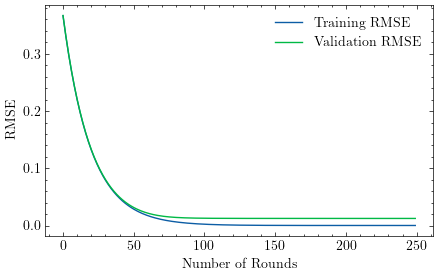

In [29]:
print(model.evals_result_.keys())

with plt.style.context('science'):    
    plt.plot(model.evals_result_['validation_0']['rmse'], label='Training RMSE')
    plt.plot(model.evals_result_['validation_1']['rmse'], label='Validation RMSE')
    plt.xlabel('Number of Rounds')
    plt.ylabel('RMSE')
    #plt.title('XGBoost Learning Curve - Richmond')
    plt.legend()
    plt.gcf().set_size_inches(5,3)
    plt.savefig(os.path.join(imagens_tese,"rich_learning_curve.pdf"), dpi=300)
    plt.show()

In [29]:
plt.scatter(y_test['Δtank_5'],inverse_pred['Δtank_5'])
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.title ('Δtank_5')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

## Cross Testing

In [30]:
data_manual=pd.read_csv(r'C:\Users\LENOVO\OneDrive - Universidade de Aveiro\universidade\Mestrado\2º Ano\Tese\Códigos\Test_epanet\Samples\Richmond\rich_cross-test_data.csv', index_col=False)
data_manual['t_step'][0]=300
data_manual = data_manual.drop(data_manual.index[-1])
data_manual.head()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12932\54031661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_manual['t_step'][0]=300


,time,t_step,tank_0,tank_1,tank_2,tank_3,tank_4,tank_5,tank_final_0,tank_final_1,...,junction_2,junction_3,junction_10,junction_13,junction_16,junction_24,junction_25,junction_27,junction_28,junction_34
0,0,300,1.8400,3.1200,1.9400,3.3700,2.4700,1.9600,1.8687,3.1200,...,6.248,4.048,12.43,2.343,4.081,1.1,0.121,1.562,0.11,17.875
1,300,300,1.8687,3.1200,1.9426,3.3937,2.4710,1.9901,1.8974,3.1200,...,6.248,4.048,12.43,2.343,4.081,1.1,0.121,1.562,0.11,17.875
2,600,300,1.8974,3.1200,1.9452,3.4172,2.4719,2.0200,1.9261,3.1201,...,6.248,4.048,12.43,2.343,4.081,1.1,0.121,1.562,0.11,17.875
3,900,300,1.9261,3.1201,1.9478,3.4406,2.4729,2.0498,1.9547,3.1202,...,6.248,4.048,12.43,2.343,4.081,1.1,0.121,1.562,0.11,17.875
4,1200,300,1.9547,3.1202,1.9505,3.4640,2.4740,2.0795,1.9834,3.1204,...,6.248,4.048,12.43,2.343,4.081,1.1,0.121,1.562,0.11,17.875


In [31]:
data_manual.max()

time            172500.000000
t_step             300.000000
tank_0               6.653100
tank_1               3.123000
tank_2               1.971300
tank_3               4.368900
tank_4               5.577100
tank_5               7.749300
tank_final_0         6.653100
tank_final_1         3.123000
tank_final_2         1.971300
tank_final_3         4.368900
tank_final_4         5.588700
tank_final_5         7.749300
pumps_0              1.000000
pumps_1              1.000000
pumps_2              1.000000
pumps_3              1.000000
pumps_4              1.000000
pumps_5              1.000000
pumps_6              1.000000
pumps_kw_0           1.610000
pumps_kw_1          51.100000
pumps_kw_2           6.620000
pumps_kw_3          11.860000
pumps_kw_4          22.060000
pumps_kw_5          18.520000
pumps_kw_6          51.100000
junction_2           9.144800
junction_3           5.924800
junction_10         18.193001
junction_13          3.429300
junction_16          5.973100
junction_2

### manual_output

In [32]:
# Tank variation
manual_out =pd.DataFrame() 
for k in range(0,6):
    manual_out["Δtank_"+str(k)] = ((data_manual["tank_final_"+str(k)]-data_manual["tank_"+str(k)])/data_manual.t_step) #m/s

# Pump Power
for f in range (7):
    manual_out['pumps_kw_'+str(f)] = data_manual.filter(['pumps_kw_'+str(f)],axis=1)

In [33]:
columns_to_drop2 = [column for column in data_manual.columns if column.startswith('pumps_kw_')]
# Drop the specified columns from the DataFrame
data_manual= data_manual.drop(columns=columns_to_drop2)
# Print the DataFrame after dropping the columns
print(data_manual.columns)


Index(['time', 't_step', 'tank_0', 'tank_1', 'tank_2', 'tank_3', 'tank_4',
       'tank_5', 'tank_final_0', 'tank_final_1', 'tank_final_2',
       'tank_final_3', 'tank_final_4', 'tank_final_5', 'pumps_0', 'pumps_1',
       'pumps_2', 'pumps_3', 'pumps_4', 'pumps_5', 'pumps_6', 'junction_2',
       'junction_3', 'junction_10', 'junction_13', 'junction_16',
       'junction_24', 'junction_25', 'junction_27', 'junction_28',
       'junction_34'],
      dtype='object')


Alterar nome tank_final_... para final_tank_...

In [34]:
columns_to_rename2 = [column for column in data_manual.columns if column.startswith('tank_final_')]
# Rename the columns
renamed_columns2 = {column: column.replace('tank_final_', 'final_tank_') for column in columns_to_rename2}
data_manual = data_manual.rename(columns=renamed_columns2)
print(data_manual.columns)

Index(['time', 't_step', 'tank_0', 'tank_1', 'tank_2', 'tank_3', 'tank_4',
       'tank_5', 'final_tank_0', 'final_tank_1', 'final_tank_2',
       'final_tank_3', 'final_tank_4', 'final_tank_5', 'pumps_0', 'pumps_1',
       'pumps_2', 'pumps_3', 'pumps_4', 'pumps_5', 'pumps_6', 'junction_2',
       'junction_3', 'junction_10', 'junction_13', 'junction_16',
       'junction_24', 'junction_25', 'junction_27', 'junction_28',
       'junction_34'],
      dtype='object')


Organizar dataset

In [35]:
data_manual = data_manual.reindex(columns=['time', 't_step', 'tank_0', 'tank_1', 'tank_2', 'tank_3', 'tank_4',
       'tank_5', 'final_tank_0', 'final_tank_1', 'final_tank_2',
       'final_tank_3', 'final_tank_4', 'final_tank_5', 'pumps_0', 'pumps_1',
       'pumps_2', 'pumps_3', 'pumps_4', 'pumps_5', 'pumps_6', 'junction_2',
       'junction_3', 'junction_10', 'junction_13', 'junction_16',
       'junction_24', 'junction_25', 'junction_27', 'junction_28',
       'junction_34'])
data_manual.columns

Index(['time', 't_step', 'tank_0', 'tank_1', 'tank_2', 'tank_3', 'tank_4',
       'tank_5', 'final_tank_0', 'final_tank_1', 'final_tank_2',
       'final_tank_3', 'final_tank_4', 'final_tank_5', 'pumps_0', 'pumps_1',
       'pumps_2', 'pumps_3', 'pumps_4', 'pumps_5', 'pumps_6', 'junction_2',
       'junction_3', 'junction_10', 'junction_13', 'junction_16',
       'junction_24', 'junction_25', 'junction_27', 'junction_28',
       'junction_34'],
      dtype='object')

In [36]:
manual_out.head()

,Δtank_0,Δtank_1,Δtank_2,Δtank_3,Δtank_4,Δtank_5,pumps_kw_0,pumps_kw_1,pumps_kw_2,pumps_kw_3,pumps_kw_4,pumps_kw_5,pumps_kw_6
0,0.000096,0.000000e+00,0.000009,0.000079,0.000003,0.000100,1.61,50.4,6.38,11.86,22.06,17.95,50.4
1,0.000096,0.000000e+00,0.000009,0.000078,0.000003,0.000100,1.61,50.4,6.37,11.86,22.06,17.93,50.4
2,0.000096,3.333333e-07,0.000009,0.000078,0.000003,0.000099,1.61,50.4,6.37,11.86,22.06,17.91,50.4
3,0.000095,3.333333e-07,0.000009,0.000078,0.000004,0.000099,1.61,50.4,6.37,11.86,22.06,17.89,50.4
4,0.000096,6.666667e-07,0.000009,0.000077,0.000003,0.000098,1.61,50.4,6.37,11.86,22.06,17.87,50.4


**total power original data**

In [37]:
# somatorio da potencia de todas as bombas naquele time step
manual_out["total_pumps_kw"] = 0
for d in range(7):
    manual_out["total_pumps_kw"] += manual_out["pumps_kw_"+str(d)]
manual_out.head()

,Δtank_0,Δtank_1,Δtank_2,Δtank_3,Δtank_4,Δtank_5,pumps_kw_0,pumps_kw_1,pumps_kw_2,pumps_kw_3,pumps_kw_4,pumps_kw_5,pumps_kw_6,total_pumps_kw
0,0.000096,0.000000e+00,0.000009,0.000079,0.000003,0.000100,1.61,50.4,6.38,11.86,22.06,17.95,50.4,160.66
1,0.000096,0.000000e+00,0.000009,0.000078,0.000003,0.000100,1.61,50.4,6.37,11.86,22.06,17.93,50.4,160.63
2,0.000096,3.333333e-07,0.000009,0.000078,0.000003,0.000099,1.61,50.4,6.37,11.86,22.06,17.91,50.4,160.61
3,0.000095,3.333333e-07,0.000009,0.000078,0.000004,0.000099,1.61,50.4,6.37,11.86,22.06,17.89,50.4,160.59
4,0.000096,6.666667e-07,0.000009,0.000077,0.000003,0.000098,1.61,50.4,6.37,11.86,22.06,17.87,50.4,160.57


In [38]:
original_total_energy = manual_out['total_pumps_kw']*data_manual.t_step

**Predict and integration**

Splir X Y

In [39]:
data_manual = data_manual.reindex(columns=['time', 't_step', 'tank_0', 'tank_1', 'tank_2', 'tank_3', 'tank_4',
       'tank_5', 'pumps_0', 'pumps_1',
       'pumps_2', 'pumps_3', 'pumps_4', 'pumps_5', 'pumps_6', 'junction_2',
       'junction_3', 'junction_10', 'junction_13', 'junction_16',
       'junction_24', 'junction_25', 'junction_27', 'junction_28',
       'junction_34', 'final_tank_0', 'final_tank_1', 'final_tank_2',
       'final_tank_3', 'final_tank_4', 'final_tank_5'])
data_manual.columns

Index(['time', 't_step', 'tank_0', 'tank_1', 'tank_2', 'tank_3', 'tank_4',
       'tank_5', 'pumps_0', 'pumps_1', 'pumps_2', 'pumps_3', 'pumps_4',
       'pumps_5', 'pumps_6', 'junction_2', 'junction_3', 'junction_10',
       'junction_13', 'junction_16', 'junction_24', 'junction_25',
       'junction_27', 'junction_28', 'junction_34', 'final_tank_0',
       'final_tank_1', 'final_tank_2', 'final_tank_3', 'final_tank_4',
       'final_tank_5'],
      dtype='object')

In [40]:
#in
tank_columns = [column for column in X_train.columns if column.startswith('tank_')]
junction_columns = [column for column in X_train.columns if column.startswith('junction_')]
##out
Δtank_columns = [column for column in y_train.columns if column.startswith('Δtank_')]
pumps_kw_columns = [column for column in y_train.columns if column.startswith('pumps_kw')]
#
## Specify the columns you want to normalize
columns_to_normalize1 = tank_columns + junction_columns
columns_to_normalize2 = Δtank_columns + pumps_kw_columns


In [41]:
# In
X_manual = data_manual.loc[:, 'tank_0':'junction_34']
# Out
y_manual= manual_out.loc[:,'Δtank_0':'pumps_kw_6']

new_x = X_manual.drop(columns=tank_columns)
new_x.head()

,pumps_0,pumps_1,pumps_2,pumps_3,pumps_4,pumps_5,pumps_6,junction_2,junction_3,junction_10,junction_13,junction_16,junction_24,junction_25,junction_27,junction_28,junction_34
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.248,4.048,12.43,2.343,4.081,1.1,0.121,1.562,0.11,17.875
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.248,4.048,12.43,2.343,4.081,1.1,0.121,1.562,0.11,17.875
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.248,4.048,12.43,2.343,4.081,1.1,0.121,1.562,0.11,17.875
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.248,4.048,12.43,2.343,4.081,1.1,0.121,1.562,0.11,17.875
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6.248,4.048,12.43,2.343,4.081,1.1,0.121,1.562,0.11,17.875


**Initial level**

In [42]:
tank_columns = [col for col in data_manual.columns if col.startswith('tank_')]
# Create a new dataframe with only the first value of each 'tank_0' column
init_level = pd.DataFrame()
for col in tank_columns:
    init_level[col] = [data_manual[col].iloc[0]]

# Print the 'init_level' dataframe
print(init_level)

   tank_0  tank_1  tank_2  tank_3  tank_4  tank_5
0    1.84    3.12    1.94    3.37    2.47    1.96


**For Standardize**

In [48]:
# Import dos scalers
scaler_in2 = joblib.load('scaler_in_richmond.joblib')
scaler_out2 = joblib.load('scaler_out_richmond.joblib')

In [49]:
scaler_in2.feature_names_in_

array(['tank_0', 'tank_1', 'tank_2', 'tank_3', 'tank_4', 'tank_5',
       'junction_2', 'junction_3', 'junction_10', 'junction_13',
       'junction_16', 'junction_24', 'junction_25', 'junction_27',
       'junction_28', 'junction_34'], dtype=object)

In [50]:
print(columns_to_normalize1)

['tank_0', 'tank_1', 'tank_2', 'tank_3', 'tank_4', 'tank_5', 'junction_2', 'junction_3', 'junction_10', 'junction_13', 'junction_16', 'junction_24', 'junction_25', 'junction_27', 'junction_28', 'junction_34']


In [51]:
# Standardize input
#data_manual_st[columns_to_normalize1] = scaler_in2.transform(data_manual_st[columns_to_normalize1])
#Standardize output
#manual_out_st[columns_to_normalize2] = scaler_out2.transform(manual_out_st[columns_to_normalize2])


### Making predictions - For cross testing

In [52]:
tank_final = pd.DataFrame()
potencia = pd.DataFrame()
tank_0 = pd.DataFrame()

pump_columns = [col for col in y_manual.columns if col.startswith('pumps_')]
final = pd.DataFrame(0,index=[0], columns=[tank_columns]) # inicializar dataframe com indice
power = pd.DataFrame(0,index=[0], columns=[pump_columns]) 
for i in range(len(data_manual['t_step'])):
    if data_manual['time'][i] == 0:
        #tank_0 = init_level  # dataframe niveis iniciais de cada tanque
        final = init_level
        power = pd.DataFrame(manual_out[pump_columns].iloc[[0]], index=[0], columns=pump_columns)
    else:
        
        tank_0 = tank_final.iloc[[-1]]
        new_row=new_x.iloc[[i]]
        x_test = pd.concat([tank_0.reset_index(drop=True), new_row.reset_index(drop=True)], axis=1)
        dtime = data_manual['t_step'][i]
        
        # Normalization
        x_normalizado = x_test.copy()
        x_normalizado[columns_to_normalize1] = scaler_in2.transform(x_normalizado[columns_to_normalize1])
        
        # Prediction
        y_pred = model.predict(x_normalizado)
        y_pred_df = pd.DataFrame(data=y_pred, columns=[columns_to_normalize2])
        
        # Desnormalizar
        y_pred_un = pd.DataFrame(scaler_out2.inverse_transform(y_pred_df[columns_to_normalize2]), columns=[columns_to_normalize2])
        # Integration
        #final = pd.DataFrame(index=y_pred_un.index) #same index as y_pred_un
        #power = pd.DataFrame(index=y_pred_un.index) #same index as y_pred_un
        for j in tank_columns:
            final[j] = (y_pred_un['Δ' + j].values * dtime) + tank_0[j].values
        for h in pump_columns:
            power[h] = y_pred_un[h]

    tank_final = pd.concat([tank_final, final], ignore_index=True)
    potencia = pd.concat([potencia, power], ignore_index=True)
    
    ## Add the last element
    #tank_0 = tank_final[-1]
    #x_test = pd.concat([tank_0.reset_index(drop=True), new_row.reset_index(drop=True)], axis=1)    dtime = manual_in['t_step'].iloc[-1]
    #x_normalizado = x_test.copy()
    #x_normalizado[columns_to_normalize1] = scaler_in2.transform(x_normalizado[columns_to_normalize1])
    #y_pred = model.predict(x_normalizado)
    #y_pred_df = pd.DataFrame(data=y_pred, columns=[columns_to_normalize2])
    #y_pred_un = scaler_out2.inverse_transform(y_pred_df[columns_to_normalize2])
    #for j in tank_columns:
    #        final[j] = (y_pred_un['Δ' + j].values * dtime) + tank_0[j].values
    #for h in pump_columns:
    #        power[h] = y_pred_un[h]
    #tank_final = pd.concat([tank_final, final], ignore_index=True)
    #potencia = pd.concat([potencia, power], ignore_index=True)
    
print(tank_final.shape)
print(potencia.shape)

(576, 6)
(576, 7)


In [53]:
tank_final.head()

,tank_0,tank_1,tank_2,tank_3,tank_4,tank_5
0,1.840000,3.120000,1.940000,3.370000,2.470000,1.960000
1,1.868746,3.119734,1.943003,3.393565,2.470997,1.988423
2,1.897492,3.119527,1.946005,3.417129,2.471994,2.016846
3,1.926238,3.119320,1.949008,3.440551,2.472991,2.045469
4,1.954984,3.119112,1.952011,3.463678,2.473989,2.074093


## Plots

In [54]:
data_manual.shape

(576, 31)

**Tanks Plot**

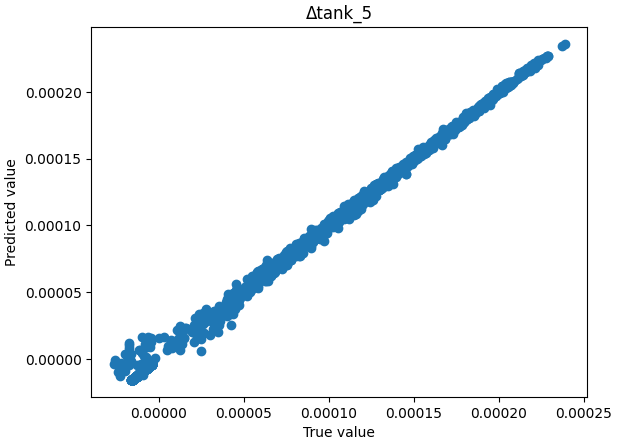

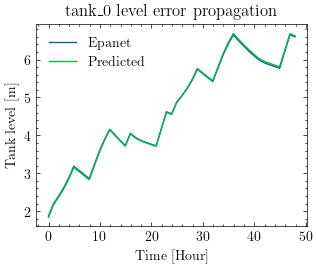

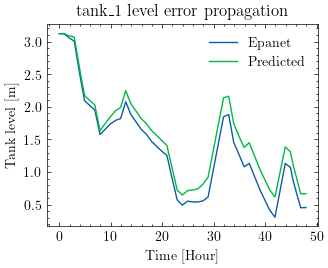

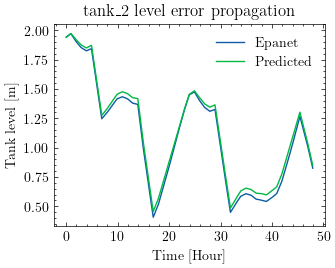

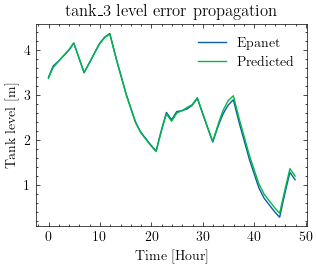

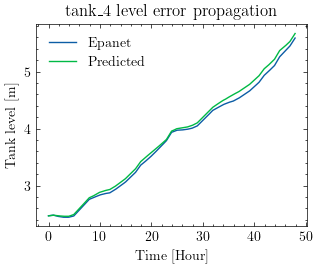

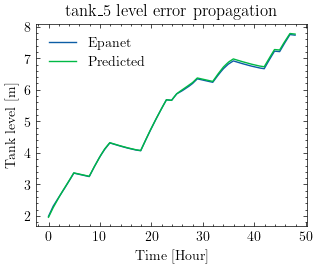

In [55]:
time_hour = data_manual['time'] / 3600

with plt.style.context('science'):    
    for m in tank_columns:
        plt.figure()  # Create a new figure for each tank column
        plt.plot(time_hour, data_manual['final_' + str(m)], label='Epanet')
        plt.plot(time_hour, tank_final[m], label='Predicted')
        plt.legend()
        plt.xlabel('Time [Hour]')
        plt.ylabel('Tank level [m]')
        plt.title('{} level error propagation'.format(m))
        plt.savefig(os.path.join(save_directory, m + " level_error_propagation.pdf"), dpi=300)
        plt.show()

Pumps plot

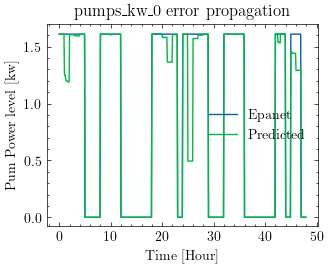

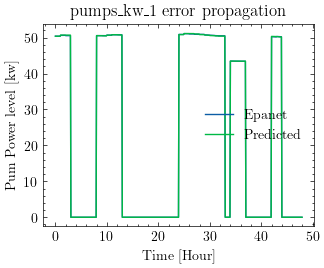

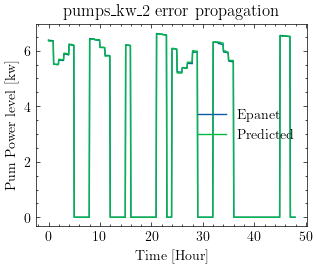

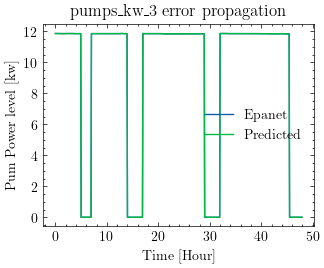

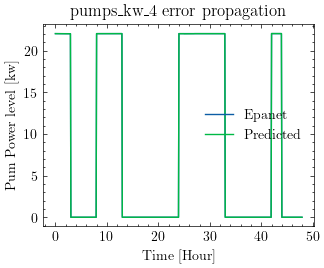

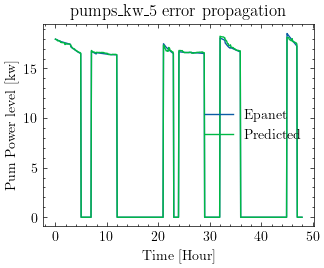

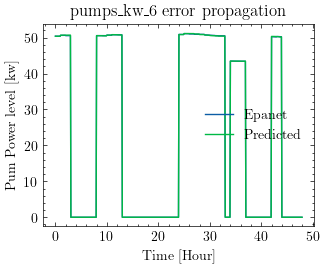

In [56]:
time_hour = data_manual['time'] / 3600
with plt.style.context('science'):    
    for j in pump_columns:
        plt.figure()  # Create a new figure for each tank column
        plt.plot(time_hour, manual_out[j], label='Epanet')
        plt.plot(time_hour, potencia[j], label='Predicted')
        plt.legend()
        plt.xlabel('Time [Hour]')
        plt.ylabel('Pum Power level [kw]')
        plt.title('{}  error propagation'.format(j))
        plt.savefig(os.path.join(save_directory, j + "_error_propagation.pdf"), dpi=300)
        plt.show()

## Metrics Cross Testing

In [57]:
# Calculate RMSE and MSE separately for pumps and tanks

# Pumps
r2_dict2_pumps = {}
rmse_dict2_pumps = {}
mse_dict2_pumps = {}

for column in pump_columns:
    r22_p = r2_score(potencia[column],manual_out[column])
    rmse2_p = np.sqrt(mean_squared_error(potencia[column], manual_out[column]))
    mse2_p = mean_squared_error(potencia[column], manual_out[column])
    
    r2_dict2_pumps[column] = r22_p
    rmse_dict2_pumps[column] = rmse2_p
    mse_dict2_pumps[column] = mse2_p

# Tanks
r2_dict2_tanks = {}
rmse_dict2_tanks = {}
mse_dict2_tanks = {}
for column in tank_columns:
    r22_t = r2_score(tank_final[column],data_manual['final_'+str(column)])
    rmse2_t = np.sqrt(mean_squared_error(tank_final[column],data_manual['final_'+str(column)]))
    mse2_t = mean_squared_error(tank_final[column],data_manual['final_'+str(column)])
    
    r2_dict2_tanks[column] = r22_t
    rmse_dict2_tanks[column] = rmse2_t
    mse_dict2_tanks[column] = mse2_t

# Create separate DataFrames for pumps and tanks
metrics_cross_pumps = pd.DataFrame({'RMSE': rmse_dict2_pumps, 'MSE': mse_dict2_pumps, 'R2': r2_dict2_pumps })
metrics_cross_tanks = pd.DataFrame({'RMSE': rmse_dict2_tanks, 'MSE': mse_dict2_tanks, 'R2': r2_dict2_tanks })

print(metrics_cross_pumps)
print(metrics_cross_tanks)

                RMSE       MSE        R2
pumps_kw_0  0.182507  0.033309  0.944404
pumps_kw_1  0.043713  0.001911  0.999997
pumps_kw_2  0.016900  0.000286  0.999969
pumps_kw_3  0.005003  0.000025  0.999999
pumps_kw_4  0.004447  0.000020  1.000000
pumps_kw_5  0.088426  0.007819  0.999892
pumps_kw_6  0.042736  0.001826  0.999997
            RMSE       MSE        R2
tank_0  0.025439  0.000647  0.999645
tank_1  0.212485  0.045150  0.897758
tank_2  0.040235  0.001619  0.991076
tank_3  0.050671  0.002568  0.997744
tank_4  0.069034  0.004766  0.994610
tank_5  0.034517  0.001191  0.999519


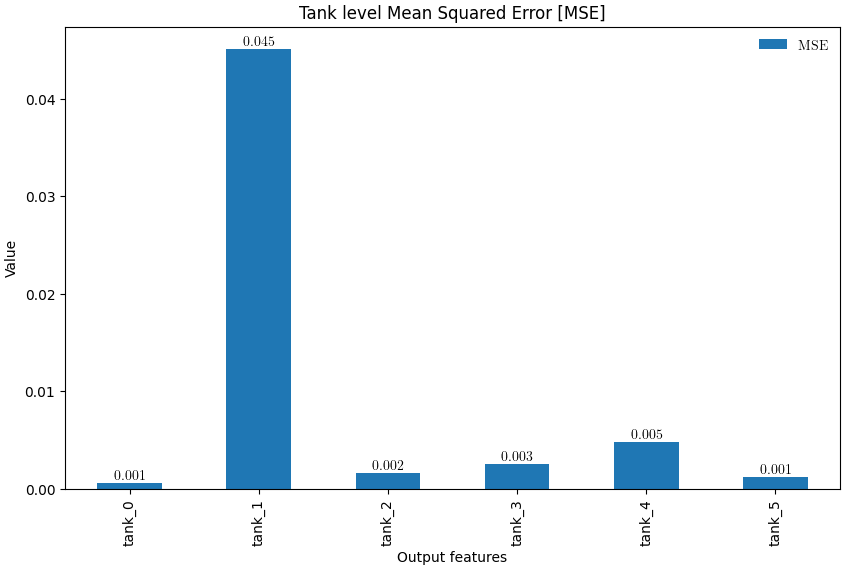

In [58]:
## Bar graph for R2 with inclined values
#r2_graph2_p = metrics_cross_pumps['R2'].plot(kind='bar', figsize=(8, 6))
#r2_graph2_p.set_xlabel('Output features')
#r2_graph2_p.set_ylabel('R2')
#r2_graph2_p.set_title('Pump Power R2 Scores')
#
## Add inclined values on top of the bars
#with plt.style.context('science'):    
#    for i in r2_graph2_p.patches:
#        r2_graph2_p.annotate(format(i.get_height(), '.3f'),
#                                (i.get_x() + i.get_width() / 2, i.get_height()),
#                                ha='center',
#                                va='center',
#                                xytext=(0, 5),
#                                textcoords='offset points',
#                                rotation='horizontal')
#    #plt.savefig(os.path.join(save_directory, "rich_Pump_Power_R2_Scores.pdf"), dpi=300)
#    plt.show()

## Bar graph for MSE with inclined values
#mse_graph2_p = metrics_cross_pumps[['MSE']].plot(kind='bar', figsize=(10, 6))
#mse_graph2_p.set_xlabel('Output features')
#mse_graph2_p.set_ylabel('Value')
#mse_graph2_p.set_title('Pump Power Mean Squared Error [MSE]')

## Bar graph RMSE with inclined values
#rmse_graph2_p = metrics_cross_pumps[['RMSE']].plot(kind='bar', figsize=(10, 6))
#rmse_graph2_p.set_xlabel('Output features')
#rmse_graph2_p.set_ylabel('Value')
#rmse_graph2_p.set_title('Pump Power Root Mean Squared Error [RMSE]')
#
## Add inclined values on top of the bars
#with plt.style.context('science'):    
#    for i in rmse_graph2_p.patches:
#        rmse_graph2_p.annotate(format(i.get_height(), '.3f'),
#                                (i.get_x() + i.get_width() / 2, i.get_height()),
#                                ha='center',
#                                va='center',
#                                xytext=(0, 5),
#                                textcoords='offset points',
#                                rotation='horizontal')
#    #plt.savefig(os.path.join(save_directory, "rich_Pump_Power_RMSE_Scores.pdf"), dpi=300)


    # Add inclined values on top of the bars
#    for i in mse_graph2_p.patches:
#        mse_graph2_p.annotate(format(i.get_height(), '.3f'),
#                                (i.get_x() + i.get_width() / 2, i.get_height()),
#                                ha='center',
#                                va='center',
#                                xytext=(0, 5),
#                                textcoords='offset points',
#                                rotation='horizontal')
#
#    plt.legend(loc='upper right')
#    #plt.savefig(os.path.join(save_directory, "rich_Pump_Power_MSE_Scores.pdf"), dpi=300)
#    plt.show()

# Tanks

## Bar graph for R2 with inclined values
#r2_graph2_t = metrics_cross_pumps['R2'].plot(kind='bar', figsize=(8, 6))
#r2_graph2_t.set_xlabel('Output features')
#r2_graph2_t.set_ylabel('R2')
#r2_graph2_t.set_title(' Tank Level R2 Scores')
#
## Add inclined values on top of the bars
#with plt.style.context('science'):    
#    for i in r2_graph2_t.patches:
#        r2_graph2_t.annotate(format(i.get_height(), '.3f'),
#                                (i.get_x() + i.get_width() / 2, i.get_height()),
#                                ha='center',
#                                va='center',
#                                xytext=(0, 5),
#                                textcoords='offset points',
#                                rotation='horizontal')
#    #plt.savefig(os.path.join(save_directory, "rich_Tank_Level_R2_Scores.pdf"), dpi=300)
#    plt.show()
    
# Bar graph for MSE with inclined values
mse_graph2_t = metrics_cross_tanks[['MSE']].plot(kind='bar', figsize=(10, 6))
mse_graph2_t.set_xlabel('Output features')
mse_graph2_t.set_ylabel('Value')
mse_graph2_t.set_title('Tank level Mean Squared Error [MSE]')

## Bar graph RMSE with inclined values
#rmse_graph2_t = metrics_cross_tanks[['RMSE']].plot(kind='bar', figsize=(10, 6))
#rmse_graph2_t.set_xlabel('Output features')
#rmse_graph2_t.set_ylabel('Value')
#rmse_graph2_t.set_title('Tank Level Root Mean Squared Error [RMSE]')

# Add inclined values on top of the bars
#with plt.style.context('science'):    
#    for i in rmse_graph2_t.patches:
#        rmse_graph2_t.annotate(format(i.get_height(), '.3f'),
#                                (i.get_x() + i.get_width() / 2, i.get_height()),
#                                ha='center',
#                                va='center',
#                                xytext=(0, 5),
#                                textcoords='offset points',
#                                rotation='horizontal')   
#    #plt.savefig(os.path.join(save_directory, "rich_Tank_Level_RMSE_Scores.pdf"), dpi=300)
#

# Add inclined values on top of the bars
with plt.style.context('science'):    
    for i in mse_graph2_t.patches:
        mse_graph2_t.annotate(format(i.get_height(), '.3f'),
                                (i.get_x() + i.get_width() / 2, i.get_height()),
                                ha='center',
                                va='center',
                                xytext=(0, 5),
                                textcoords='offset points',
                                rotation='horizontal')
    plt.savefig(os.path.join(save_directory, "rich_Tank_Level_MSE_Scores.pdf"), dpi=300)
    plt.legend(loc='upper right')
    plt.show()

In [59]:
# Compute global metrics for pumps
global_r2_pumps = np.mean(list(r2_dict2_pumps.values()))
global_rmse_pumps = np.mean(list(rmse_dict2_pumps.values()))
global_mse_pumps = np.mean(list(mse_dict2_pumps.values()))

# Compute global metrics for tanks
global_r2_tanks = np.mean(list(r2_dict2_tanks.values()))
global_rmse_tanks = np.mean(list(rmse_dict2_tanks.values()))
global_mse_tanks = np.mean(list(mse_dict2_tanks.values()))

# Create DataFrame for global metrics
global_metrics_pumps = pd.DataFrame({'Global RMSE': [global_rmse_pumps], 'Global MSE': [global_mse_pumps], 'Global R2': [global_r2_pumps]})
global_metrics_tanks = pd.DataFrame({'Global RMSE': [global_rmse_tanks], 'Global MSE': [global_mse_tanks], 'Global R2': [global_r2_tanks]})

print("Global Metrics for Pumps")
print(global_metrics_pumps)

print("Global Metrics for Tanks")
print(global_metrics_tanks)

Global Metrics for Pumps
   Global RMSE  Global MSE  Global R2
0     0.054819    0.006457   0.992037
Global Metrics for Tanks
   Global RMSE  Global MSE  Global R2
0     0.072064    0.009323   0.980059


### Erro relativo

erro_relativo = erro(x)*100/(xmax-xmin)

In [60]:
erro_p = {}  # Dictionary to store absolute error values
erro_t = {} 

for column in pump_columns:
        erro_p[column] = abs(manual_out[column] - potencia[column])
        
for column in tank_columns:
        erro_t[column] = abs(data_manual['final_'+str(column)] - tank_final[column])

# Erro relativo
relative_error_p = {}
for column, erro in erro_p.items():
        pump_max = manual_out[column].max()
        pump_min = manual_out[column].min()
        relative_error_p[column] = erro * 100 / (pump_max - pump_min)
        
relative_error_t = {}
for column, erro in erro_t.items():
        final_tank_max = data_manual[column].max()
        final_tank_min = data_manual[column].min()
        relative_error_t[column] = erro * 100 / (final_tank_max - final_tank_min)


In [61]:
t_rel_error_df = pd.DataFrame.from_dict(relative_error_t, orient='columns')
p_rel_error_df = pd.DataFrame.from_dict(relative_error_p, orient='columns')

error plots

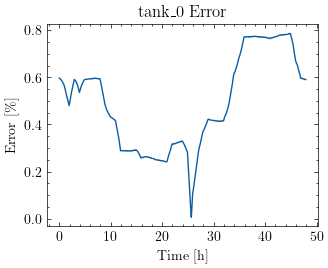

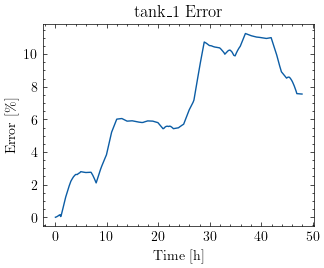

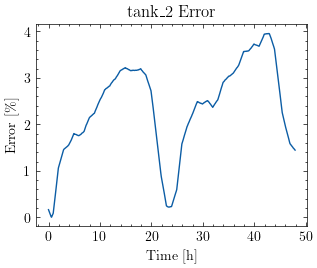

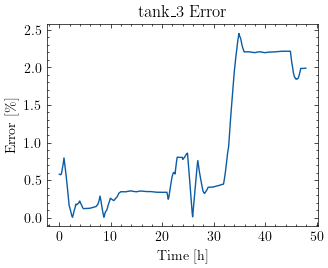

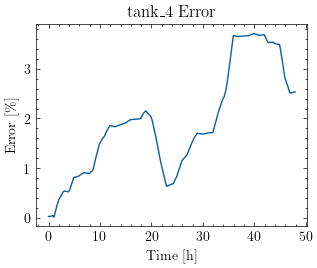

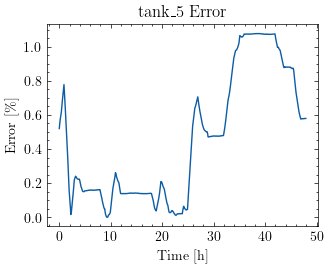

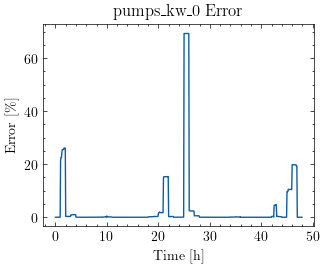

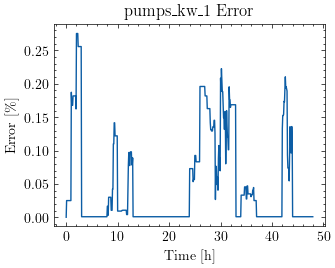

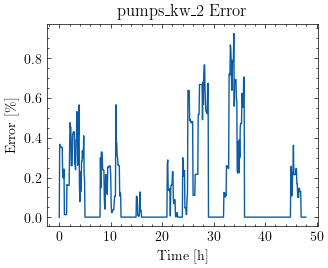

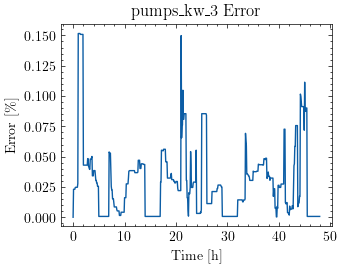

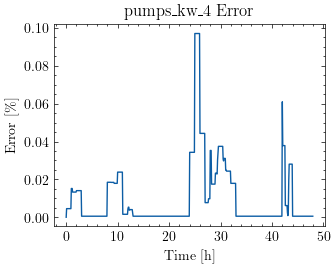

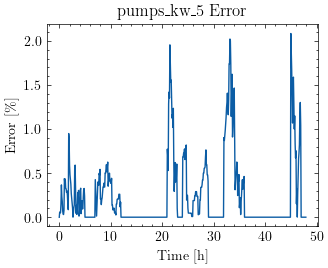

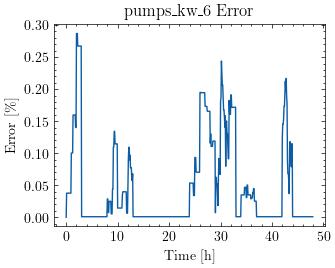

In [62]:
with plt.style.context('science'):    
    for t in t_rel_error_df.columns:
        plt.figure()  # Create a new figure for each tank column

        plt.plot(time_hour, t_rel_error_df[t])
        plt.xlabel('Time [h]')
        plt.ylabel('Error [\%]')
        plt.title('{} Error'.format(t))
        plt.savefig(os.path.join(save_directory, "rich_t" + t +  "_error.pdf"), dpi=300)
        plt.show()
    

with plt.style.context('science'):      
    for p in p_rel_error_df.columns:
        plt.figure()  # Create a new figure for each tank column
        
        plt.plot(time_hour, p_rel_error_df[p])
        plt.xlabel('Time [h]')
        plt.ylabel('Error [\%]')
        plt.title('{} Error'.format(p))
        plt.savefig(os.path.join(save_directory, "rich_t" + t +  "_error.pdf"), dpi=300)
        plt.show()

Energia

In [63]:
original_total_energy

0      48198.0
1      48189.0
2      48183.0
3      48177.0
4      48171.0
        ...   
571        0.0
572        0.0
573        0.0
574        0.0
575        0.0
Length: 576, dtype: float64

In [64]:
# somatorio da potencia de todas as bombas naquele time step
potencia["total_pumps_kw"] = 0
for d in range(7):
    potencia["total_pumps_kw"] += potencia["pumps_kw_"+str(d)]
potencia.head()

,pumps_kw_0,pumps_kw_1,pumps_kw_2,pumps_kw_3,pumps_kw_4,pumps_kw_5,pumps_kw_6,total_pumps_kw
0,1.610000,50.400000,6.380000,11.860000,22.060000,17.950000,50.400000,160.660000
1,1.610147,50.387226,6.345690,11.857262,22.058996,17.919146,50.380764,160.559230
2,1.610337,50.387226,6.346396,11.857262,22.058996,17.919146,50.380764,160.560127
3,1.610565,50.387226,6.346431,11.857262,22.058996,17.899815,50.380764,160.541059
4,1.610565,50.387226,6.346431,11.857262,22.058996,17.898388,50.380764,160.539632


In [65]:
pred_total_energy = potencia['total_pumps_kw']*data_manual.t_step

In [66]:
pred_accu_e = 0
pred_accumulated_energy = []
for g in range(len(pred_total_energy)):
    pred_accu_e += pred_total_energy.iloc[g]
    pred_accumulated_energy.append(pred_accu_e)

In [67]:
real_accu_e = 0
real_accumulated_energy = []
for g in range(len(original_total_energy)):
    real_accu_e += original_total_energy.iloc[g]
    real_accumulated_energy.append(real_accu_e)

In [68]:
with plt.style.context('science'):    
    plt.plot(time_hour,real_accumulated_energy, label = 'Epanet')
    plt.plot(time_hour,pred_accumulated_energy, label = 'Predicted')
    plt.legend()
    plt.title('Accumulated energy')
    plt.xlabel('Hour')
    plt.ylabel('Energy [J]')
    plt.show

In [69]:
shap.summary_plot(values, feature_names=X_test.columns, max_display=len(X_test.columns))

NameError: name 'shap' is not defined